In [1]:
# import statements
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import missingno as msno
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/eyobmanhardt/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/Users/eyobmanhardt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import dropbox
from zipfile import ZipFile
import pandas as pd
from data_extract_utils import extract_zip

# Connect to dropbox
dbx = dropbox.Dropbox('cHV7yAR0J6YAAAAAAAAAAVQ1NLCrOwerbaNltPWHslYXKuUTJ5_wfgJsuFcmx83o')

In [3]:
# Download, and extract data from dropbox into memory. 
data = {}
for entry in dbx.files_list_folder('').entries:
    response = dbx.files_download('/{}'.format(entry.name))
    
    if 'zip' in entry.name:
        content = extract_zip(response[1].content)
    
        for file in content:
            df = pd.read_csv(file[1])
            data[entry.name.replace('.csv.zip', '')] = df

## Files for this notebook:

In [6]:
application_train = data['application_train']
# POS_CASH_balance = pd.read_csv('home-credit-default-risk/POS_CASH_balance.csv')
# previous_application = pd.read_csv('home-credit-default-risk/previous_application.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Useful functions

In [8]:
def get_missing_data_info(df):
    """
    add description .. 
    
    """
    num_of_instance, _ = df.shape
    #print(num_of_instance)
    names = {'index': 'feature', 
             0: 'PERC_missing_data'}
    
    missing_df = (df.isnull() \
        .sum(axis=0)/num_of_instance) \
        .to_frame() \
        .reset_index() \
        .rename(columns=names) \
        .sort_values(by='PERC_missing_data', ascending=False) \
        .reset_index(drop=True)
    
    d = {}
    # no missing 
    zero = missing_df[missing_df['PERC_missing_data'] == 0]
    d['x = 0'] = list(zero.feature)
    le_10 = missing_df[(missing_df['PERC_missing_data'] > 0.0) & (missing_df['PERC_missing_data'] <= 0.1)]
    
    d['0< x <= 25'] = list(missing_df[(missing_df['PERC_missing_data'] > 0.0) & (missing_df['PERC_missing_data'] <= 0.25)].feature)
    
    d['25 < x <= 50'] = list(missing_df[(missing_df['PERC_missing_data'] > 0.25) & (missing_df['PERC_missing_data'] <= 0.5)].feature)
    
    d['x > 50'] = list(missing_df[missing_df['PERC_missing_data'] > 0.5].feature)
    
    return missing_df, d

In [9]:
def get_description_table(path, table):
    description_table = "| index | table | feature | description | notes |"
    description_table += "\n" + "| :--- | :---: | :---: | :---: | :---:|"
    with open(path) as fi:
        reader = csv.reader(fi, delimiter=',')
        # skip header 
        next(reader)
        for line in reader:
            # filter 
            if line[1] == table:
                ## no comment/notes for feature
                if len(line[-1]) == 0:
                    line[-1] = 'nc'

                 ## reomve pipe from   
                if line[1] == 'application_{train|test}.csv':
                    line[1] = line[1].replace('|', '-')

                ## create a new line
                new_line = '|' + '|'.join(line) + '|'

                ## add line to description table
                description_table += '\n' + new_line
                
    return description_table
            

    #print(description_table)

# Application Train

## Display description table

In [11]:
table = 'application_{train|test}.csv'
path = 'HomeCredit_columns_description_fix2.csv'
desc_application = get_description_table(path, table)
#print(desc_application)

| index | table | feature | description | notes |
| :--- | :---: | :---: | :---: | :---:|
|1|application_{train-test}.csv|SK_ID_CURR|ID of loan in our sample|nc|
|2|application_{train-test}.csv|TARGET|Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)|nc|
|5|application_{train-test}.csv|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|nc|
|6|application_{train-test}.csv|CODE_GENDER|Gender of the client|nc|
|7|application_{train-test}.csv|FLAG_OWN_CAR|Flag if the client owns a car|nc|
|8|application_{train-test}.csv|FLAG_OWN_REALTY|Flag if client owns a house or flat|nc|
|9|application_{train-test}.csv|CNT_CHILDREN|Number of children the client has|nc|
|10|application_{train-test}.csv|AMT_INCOME_TOTAL|Income of the client|nc|
|11|application_{train-test}.csv|AMT_CREDIT|Credit amount of the loan|nc|
|12|application_{train-test}.csv|AMT_ANNUITY|Loan annuity|nc|
|13|application_{train-test}.csv|AMT_GOODS_PRICE|For consumer loans it is the price of the goods for which the loan is given|nc|
|14|application_{train-test}.csv|NAME_TYPE_SUITE|Who was accompanying client when he was applying for the loan|nc|
|15|application_{train-test}.csv|NAME_INCOME_TYPE|Clients income type (businessman, working, maternity leave,Ö)|nc|
|16|application_{train-test}.csv|NAME_EDUCATION_TYPE|Level of highest education the client achieved|nc|
|17|application_{train-test}.csv|NAME_FAMILY_STATUS|Family status of the client|nc|
|18|application_{train-test}.csv|NAME_HOUSING_TYPE|What is the housing situation of the client (renting, living with parents, ...)|nc|
|19|application_{train-test}.csv|REGION_POPULATION_RELATIVE|Normalized population of region where client lives (higher number means the client lives in more populated region)|normalized |
|20|application_{train-test}.csv|DAYS_BIRTH|Client's age in days at the time of application|time only relative to the application|
|21|application_{train-test}.csv|DAYS_EMPLOYED|How many days before the application the person started current employment|time only relative to the application|
|22|application_{train-test}.csv|DAYS_REGISTRATION|How many days before the application did client change his registration|time only relative to the application|
|23|application_{train-test}.csv|DAYS_ID_PUBLISH|How many days before the application did client change the identity document with which he applied for the loan|time only relative to the application|
|24|application_{train-test}.csv|OWN_CAR_AGE|Age of client's car|nc|
|25|application_{train-test}.csv|FLAG_MOBIL|Did client provide mobile phone (1=YES, 0=NO)|nc|
|26|application_{train-test}.csv|FLAG_EMP_PHONE|Did client provide work phone (1=YES, 0=NO)|nc|
|27|application_{train-test}.csv|FLAG_WORK_PHONE|Did client provide home phone (1=YES, 0=NO)|nc|
|28|application_{train-test}.csv|FLAG_CONT_MOBILE|Was mobile phone reachable (1=YES, 0=NO)|nc|
|29|application_{train-test}.csv|FLAG_PHONE|Did client provide home phone (1=YES, 0=NO)|nc|
|30|application_{train-test}.csv|FLAG_EMAIL|Did client provide email (1=YES, 0=NO)|nc|
|31|application_{train-test}.csv|OCCUPATION_TYPE|What kind of occupation does the client have|nc|
|32|application_{train-test}.csv|CNT_FAM_MEMBERS|How many family members does client have|nc|
|33|application_{train-test}.csv|REGION_RATING_CLIENT|Our rating of the region where client lives (1,2,3)|nc|
|34|application_{train-test}.csv|REGION_RATING_CLIENT_W_CITY|Our rating of the region where client lives with taking city into account (1,2,3)|nc|
|35|application_{train-test}.csv|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for the loan|nc|
|36|application_{train-test}.csv|HOUR_APPR_PROCESS_START|Approximately at what hour did the client apply for the loan|rounded|
|37|application_{train-test}.csv|REG_REGION_NOT_LIVE_REGION|Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)|nc|
|38|application_{train-test}.csv|REG_REGION_NOT_WORK_REGION|Flag if client's permanent address does not match work address (1=different, 0=same, at region level)|nc|
|39|application_{train-test}.csv|LIVE_REGION_NOT_WORK_REGION|Flag if client's contact address does not match work address (1=different, 0=same, at region level)|nc|
|40|application_{train-test}.csv|REG_CITY_NOT_LIVE_CITY|Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)|nc|
|41|application_{train-test}.csv|REG_CITY_NOT_WORK_CITY|Flag if client's permanent address does not match work address (1=different, 0=same, at city level)|nc|
|42|application_{train-test}.csv|LIVE_CITY_NOT_WORK_CITY|Flag if client's contact address does not match work address (1=different, 0=same, at city level)|nc|
|43|application_{train-test}.csv|ORGANIZATION_TYPE|Type of organization where client works|nc|
|44|application_{train-test}.csv|EXT_SOURCE_1|Normalized score from external data source|normalized|
|45|application_{train-test}.csv|EXT_SOURCE_2|Normalized score from external data source|normalized|
|46|application_{train-test}.csv|EXT_SOURCE_3|Normalized score from external data source|normalized|
|47|application_{train-test}.csv|APARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|48|application_{train-test}.csv|BASEMENTAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|49|application_{train-test}.csv|YEARS_BEGINEXPLUATATION_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|50|application_{train-test}.csv|YEARS_BUILD_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|51|application_{train-test}.csv|COMMONAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|52|application_{train-test}.csv|ELEVATORS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|53|application_{train-test}.csv|ENTRANCES_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|54|application_{train-test}.csv|FLOORSMAX_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|55|application_{train-test}.csv|FLOORSMIN_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|56|application_{train-test}.csv|LANDAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|57|application_{train-test}.csv|LIVINGAPARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|58|application_{train-test}.csv|LIVINGAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|59|application_{train-test}.csv|NONLIVINGAPARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|60|application_{train-test}.csv|NONLIVINGAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|61|application_{train-test}.csv|APARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|62|application_{train-test}.csv|BASEMENTAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|63|application_{train-test}.csv|YEARS_BEGINEXPLUATATION_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|64|application_{train-test}.csv|YEARS_BUILD_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|65|application_{train-test}.csv|COMMONAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|66|application_{train-test}.csv|ELEVATORS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|67|application_{train-test}.csv|ENTRANCES_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|68|application_{train-test}.csv|FLOORSMAX_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|69|application_{train-test}.csv|FLOORSMIN_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|70|application_{train-test}.csv|LANDAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|71|application_{train-test}.csv|LIVINGAPARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|72|application_{train-test}.csv|LIVINGAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|73|application_{train-test}.csv|NONLIVINGAPARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|74|application_{train-test}.csv|NONLIVINGAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|75|application_{train-test}.csv|APARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|76|application_{train-test}.csv|BASEMENTAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|77|application_{train-test}.csv|YEARS_BEGINEXPLUATATION_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|78|application_{train-test}.csv|YEARS_BUILD_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|79|application_{train-test}.csv|COMMONAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|80|application_{train-test}.csv|ELEVATORS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|81|application_{train-test}.csv|ENTRANCES_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|82|application_{train-test}.csv|FLOORSMAX_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|83|application_{train-test}.csv|FLOORSMIN_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|84|application_{train-test}.csv|LANDAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|85|application_{train-test}.csv|LIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|86|application_{train-test}.csv|LIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|87|application_{train-test}.csv|NONLIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|88|application_{train-test}.csv|NONLIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|89|application_{train-test}.csv|FONDKAPREMONT_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|90|application_{train-test}.csv|HOUSETYPE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|91|application_{train-test}.csv|TOTALAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|92|application_{train-test}.csv|WALLSMATERIAL_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|93|application_{train-test}.csv|EMERGENCYSTATE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|94|application_{train-test}.csv|OBS_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 30 DPD (days past due) default|nc|
|95|application_{train-test}.csv|DEF_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 30 DPD (days past due) |nc|
|96|application_{train-test}.csv|OBS_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 60 DPD (days past due) default|nc|
|97|application_{train-test}.csv|DEF_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 60 (days past due) DPD|nc|
|98|application_{train-test}.csv|DAYS_LAST_PHONE_CHANGE|How many days before application did client change phone|nc|
|99|application_{train-test}.csv|FLAG_DOCUMENT_2|Did client provide document 2|nc|
|100|application_{train-test}.csv|FLAG_DOCUMENT_3|Did client provide document 3|nc|
|101|application_{train-test}.csv|FLAG_DOCUMENT_4|Did client provide document 4|nc|
|102|application_{train-test}.csv|FLAG_DOCUMENT_5|Did client provide document 5|nc|
|103|application_{train-test}.csv|FLAG_DOCUMENT_6|Did client provide document 6|nc|
|104|application_{train-test}.csv|FLAG_DOCUMENT_7|Did client provide document 7|nc|
|105|application_{train-test}.csv|FLAG_DOCUMENT_8|Did client provide document 8|nc|
|106|application_{train-test}.csv|FLAG_DOCUMENT_9|Did client provide document 9|nc|
|107|application_{train-test}.csv|FLAG_DOCUMENT_10|Did client provide document 10|nc|
|108|application_{train-test}.csv|FLAG_DOCUMENT_11|Did client provide document 11|nc|
|109|application_{train-test}.csv|FLAG_DOCUMENT_12|Did client provide document 12|nc|
|110|application_{train-test}.csv|FLAG_DOCUMENT_13|Did client provide document 13|nc|
|111|application_{train-test}.csv|FLAG_DOCUMENT_14|Did client provide document 14|nc|
|112|application_{train-test}.csv|FLAG_DOCUMENT_15|Did client provide document 15|nc|
|113|application_{train-test}.csv|FLAG_DOCUMENT_16|Did client provide document 16|nc|
|114|application_{train-test}.csv|FLAG_DOCUMENT_17|Did client provide document 17|nc|
|115|application_{train-test}.csv|FLAG_DOCUMENT_18|Did client provide document 18|nc|
|116|application_{train-test}.csv|FLAG_DOCUMENT_19|Did client provide document 19|nc|
|117|application_{train-test}.csv|FLAG_DOCUMENT_20|Did client provide document 20|nc|
|118|application_{train-test}.csv|FLAG_DOCUMENT_21|Did client provide document 21|nc|
|119|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_HOUR|Number of enquiries to Credit Bureau about the client one hour before application|nc|
|120|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_DAY|Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)|nc|
|121|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_WEEK|Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)|nc|
|122|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)|nc|
|123|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_QRT|Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)|nc|
|124|application_{train-test}.csv|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)|nc|

## Basic information 

In [12]:
cat1, numeric1 = (application_train.select_dtypes(include = [object]), 
                  application_train.select_dtypes(include = [int, float]))

print('Shape: ' + str(application_train.shape))
print('Number of features including target: ' + str(application_train.shape[1]))
print('Number of numerical features: ' + str(numeric1.shape[1]))
print('Number of categorical features: ' + str(cat1.shape[1]))
print('Number of instnaces: ' + str(application_train.shape[0]))

Shape: (307511, 122)
Number of features including target: 122
Number of numerical features: 106
Number of categorical features: 16
Number of instnaces: 307511


## Missing data

In [13]:
app_missing_info, d = get_missing_data_info(application_train)  

In [14]:
# display 
app_missing_info.head()

,feature,PERC_missing_data
0,COMMONAREA_MEDI,0.698723
1,COMMONAREA_AVG,0.698723
2,COMMONAREA_MODE,0.698723
3,NONLIVINGAPARTMENTS_MODE,0.694330
4,NONLIVINGAPARTMENTS_AVG,0.694330


**NOTE 1**
- The table above displays the % of missing values for each feature in the application train data set sorted in descending order.

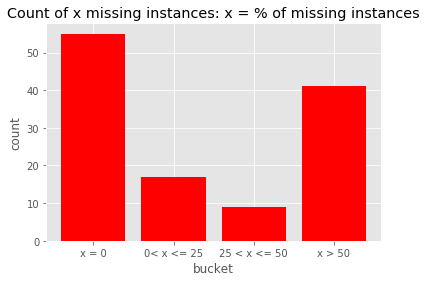

In [15]:
## bar chart of missing instances 
x_y = [(item[0], len(item[1])) for item in d.items()]
x,y = [i[0] for i in x_y ], [j[1] for j in x_y ]
pos = [i for i, _ in enumerate(x)]

plt.style.use('ggplot')
plt.bar(pos, y, color='red')
plt.xlabel("bucket")
plt.ylabel("count")
plt.title("Count of x missing instances: x = % of missing instances")
plt.xticks(pos, x)
plt.show()

**NOTE 2: basic information with missing values**

For the application train dataset:
- number of features: 122
- number of features containing **NO** missing values: 55
- number of features containing missing values: 67
    - number of features containing: $ 0\% <$ **missing values** $\le 25\% \Rightarrow$ 17
    - number of features containing: $25\% <$ **missing values** $\le 50\% \Rightarrow$ 9
    - number of features containing: **missing values** $> 50\% \Rightarrow$ 41

In [16]:
## observe the features that have missing values > 50%
for col in d['x > 50']:
    print(col)

COMMONAREA_MEDI
COMMONAREA_AVG
COMMONAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAPARTMENTS_AVG
NONLIVINGAPARTMENTS_MEDI
FONDKAPREMONT_MODE
LIVINGAPARTMENTS_MODE
LIVINGAPARTMENTS_AVG
LIVINGAPARTMENTS_MEDI
FLOORSMIN_AVG
FLOORSMIN_MODE
FLOORSMIN_MEDI
YEARS_BUILD_MEDI
YEARS_BUILD_MODE
YEARS_BUILD_AVG
OWN_CAR_AGE
LANDAREA_MEDI
LANDAREA_MODE
LANDAREA_AVG
BASEMENTAREA_MEDI
BASEMENTAREA_AVG
BASEMENTAREA_MODE
EXT_SOURCE_1
NONLIVINGAREA_MODE
NONLIVINGAREA_AVG
NONLIVINGAREA_MEDI
ELEVATORS_MEDI
ELEVATORS_AVG
ELEVATORS_MODE
WALLSMATERIAL_MODE
APARTMENTS_MEDI
APARTMENTS_AVG
APARTMENTS_MODE
ENTRANCES_MEDI
ENTRANCES_AVG
ENTRANCES_MODE
LIVINGAREA_AVG
LIVINGAREA_MODE
LIVINGAREA_MEDI
HOUSETYPE_MODE


**NOTE 3**

Using the description table above,the features that contain a high volume of missing values are basic statistics about the client's housing information. Therefore, without knowing the specific locations the data was sampled from **(perhaps it will be beneficial to research where the data was sampled from and see if we can determine the specific location(s))** we can assume the following two things about these missing instances:

 - (1) the missing values corresponds to unknown information i.e the following statistics/information about the specific house is not applicable for that house
     - for example house A - doesn't have a basement; therefore, all of the basement statistics: BASEMENTAREA_MEDI, BASEMENTAREA_AVG, BASEMENTAREA_MODE will be NA.
     
- (2) Simple case: information was not provided or can't be determined (this can also be a consequences of case 1)

**Assumption 1 train of thought**

- If assumption 1 is true then there should be a **distinct relationship** between the features and the number of missing values relative to all of the features in our dataset. Another way of thinking about this is the following: given that each column (i.e feature) contains more than 50% of null values then for each instance (i.e row) the features are **highly** correlated. 

In other words if feature A is missing than feature B, C, D, ... will also be missing.

How would we test this?
- missingno library

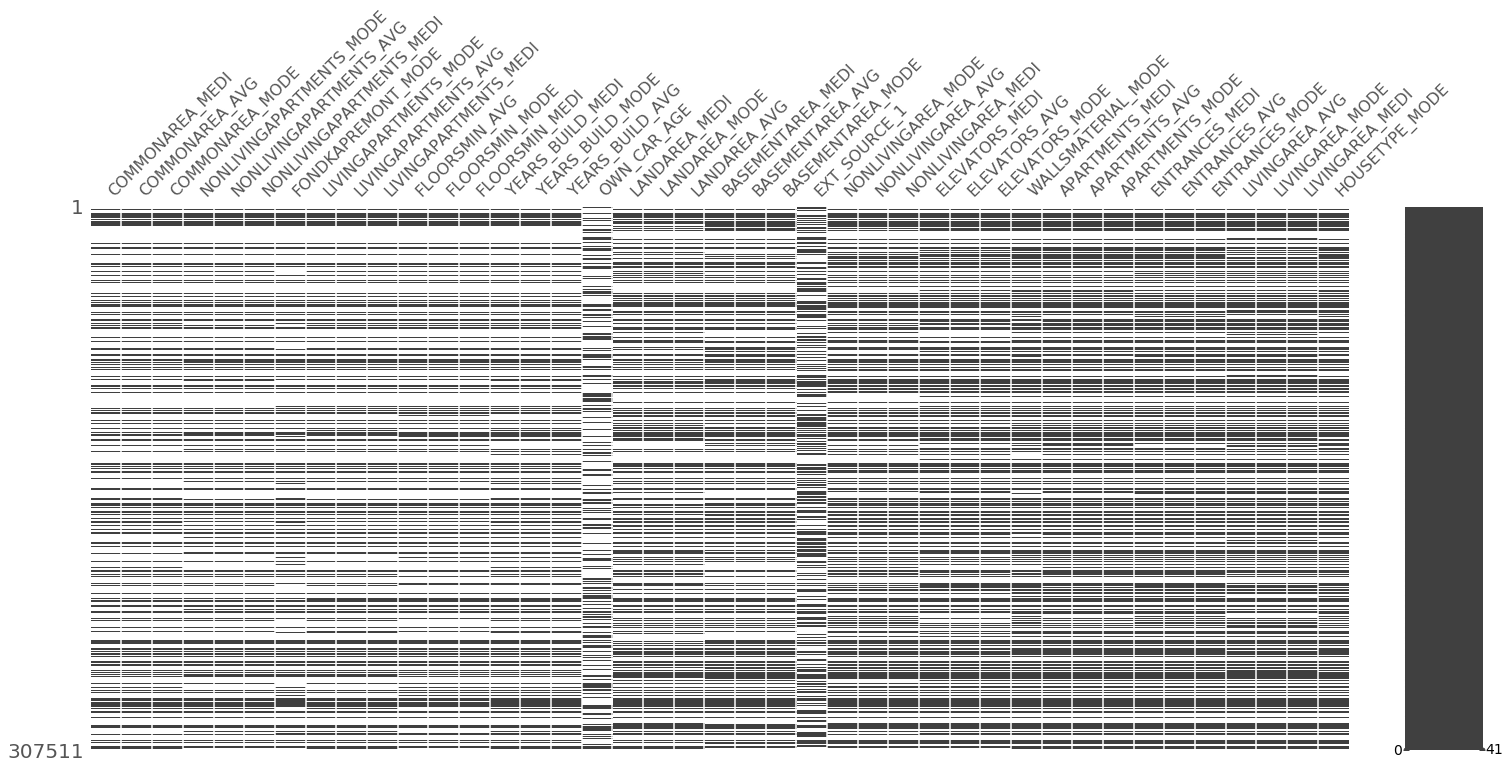

In [17]:
msno.matrix(application_train.loc[:, d['x > 50']])
plt.show()

**NOTE 4**
- Quite a few instances where all or almost all of the features have a missing value
- Significantly more missing values towards the first quadrant of features: COMMONAREA_MEDI - YEARS_BUILD_AVG
    - sorted 
- Distinct features: OWN_CAR_AGE, EXT_SOURCE_1

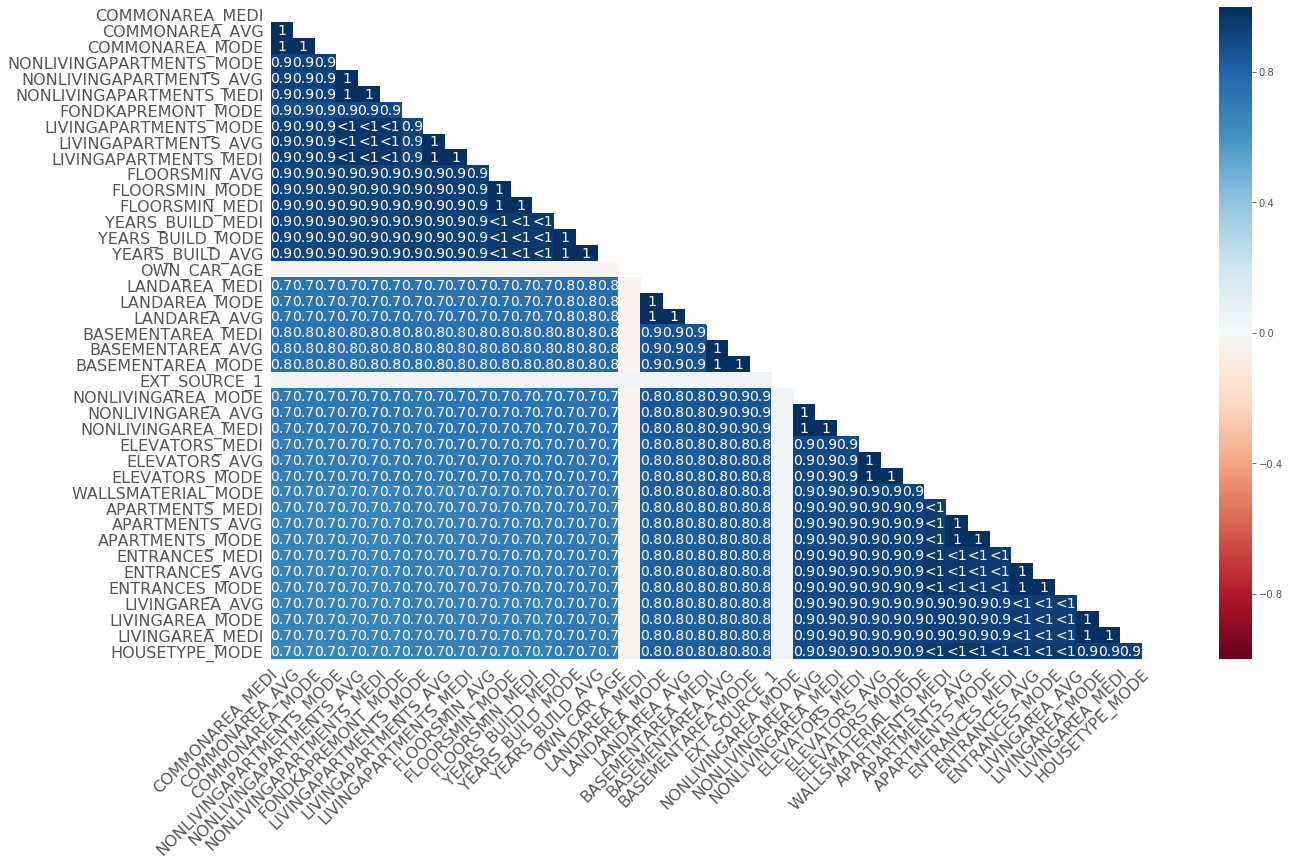

In [18]:
#RdBu #seismic
msno.heatmap(application_train.loc[:, d['x > 50']])
plt.show()

**NOTE 5**
- As we assumed, the missing values amongst the different features are highly correlated except for EXT_SOURCE_1 and OWN_CAR_AGE
- quite concern with '< 1' entries I don't know what that means ... :(

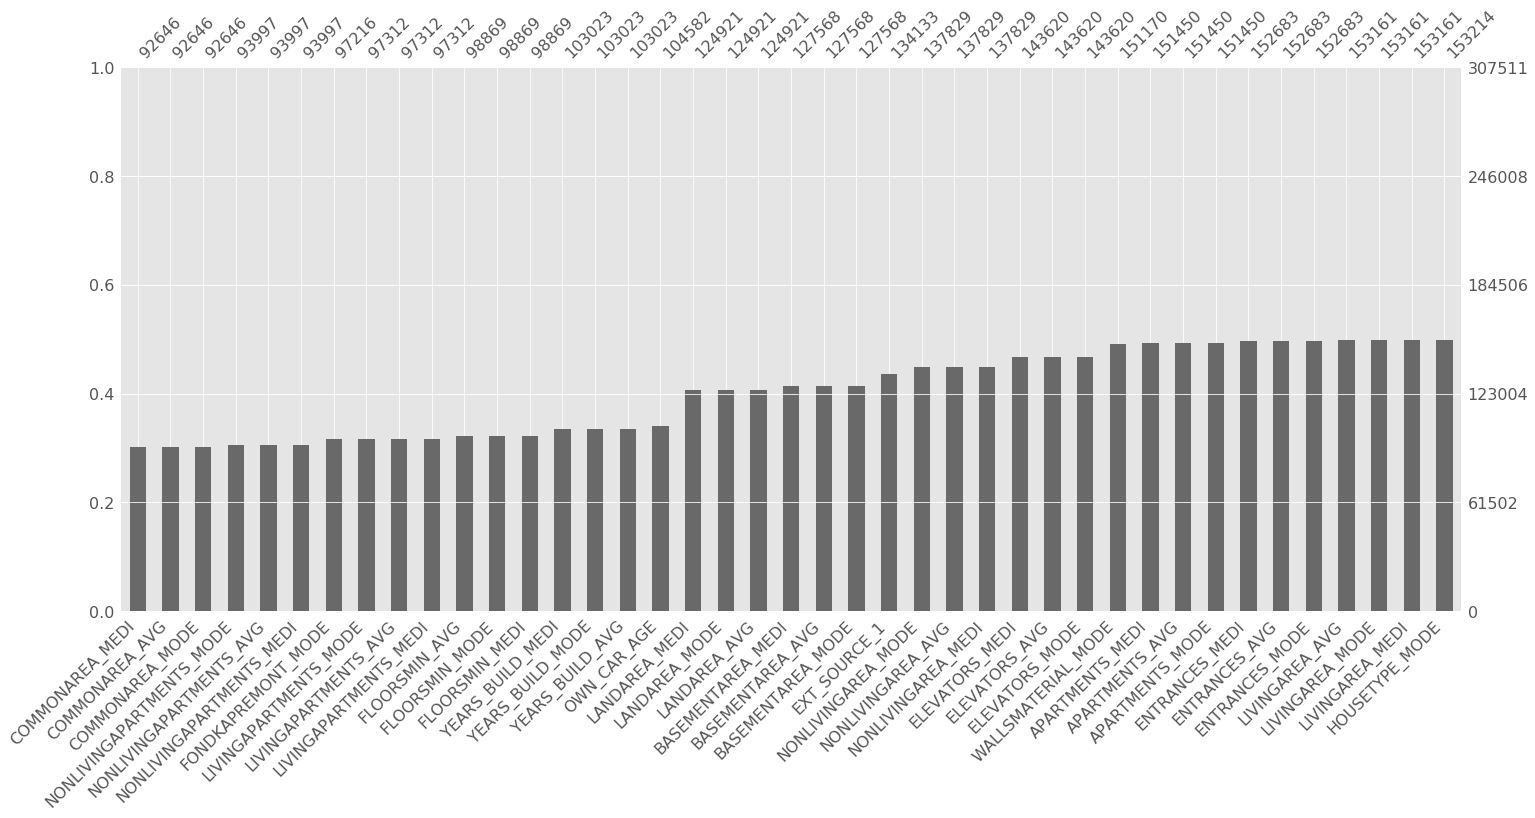

In [19]:
msno.bar(application_train.loc[:, d['x > 50']])
#plt.title("prop of non-null values")
plt.show()

**NOTE 6**

The bar graph above is similar to our previous bar graph; however, this graph displays the prop of non-null values with respect of each feature in the data set. Our previous bar graph displayed the prop of missing values for all features that lie within a particular bucket.

### Missing value: conclusion

**MAIN QUESTION: HOW DO WE DEAL WITH THE MISSING VALUES?**

- The simplest solution is to drop them ... however, I believe we should try our best to avoid dropping missing data.
    - The majority of these features are numerical type - therefore, we can impute or interpellate the missing values once we understand the distribution of these feature ---> next step understand the distribution!

- We discovered: features with high volume of missing values tend to be correlated - specifically the missing values themselves are correlated. 
- Keep an eye out for EXT_SOURCE_1 and OWN_CAR_AGE

## Distribution

Let's first observe the distribution of the categorical features. Recall, there are 16 categorical features; therefore, for visual purposes, we're going to display the plots four at a time. 

### Categorical

In [20]:
cat1.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


**NOTE 7**

Based on the display above, there appear to be four categorical features with binary values: 
- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- EMERGENCYSTATE_MODE

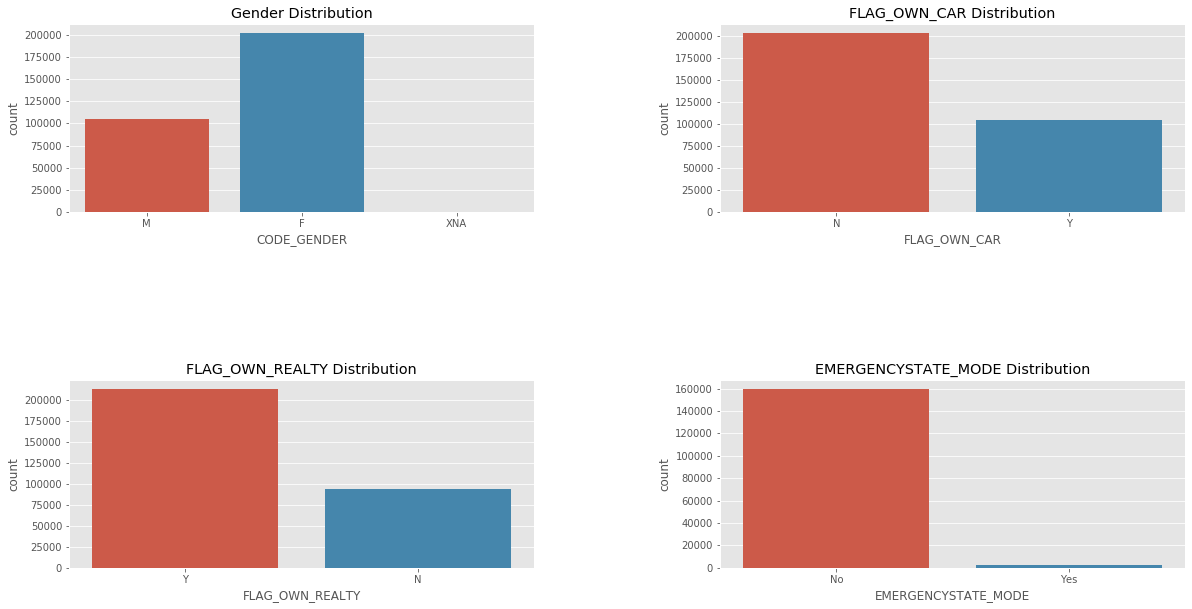

In [21]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20,10))

# CODE_GENDER
sns.countplot(cat1['CODE_GENDER'], ax = ax[0,0])
ax[0,0].set_title('Gender Distribution')

# FLAG_OWN_CAR
sns.countplot(cat1['FLAG_OWN_CAR'], ax = ax[0,1])
ax[0,1].set_title('FLAG_OWN_CAR Distribution')

# FLAG_OWN_REALTY
sns.countplot(cat1['FLAG_OWN_REALTY'], ax = ax[1,0])
ax[1,0].set_title('FLAG_OWN_REALTY Distribution')

# EMERGENCYSTATE_MODE
sns.countplot(cat1['EMERGENCYSTATE_MODE'], ax = ax[1,1])
ax[1,1].set_title('EMERGENCYSTATE_MODE Distribution')

plt.subplots_adjust(hspace = 0.9, wspace = 0.4)
plt.show()


**NOTE 8**

The plots above **do not** include null values. Out of these four features, only EMERGENCYSTATE_MODE contains null values ... and a significant amount. 

CODE_GENDER
- Approximately - 2/3 of the clients are female in this dataset
- 4 instances of unknown gender: XNA

FLAG_OWN_CAR
- About 2/3 of the population doesn't own a car.

FLAG_OWN_REALTY
- About 70% of the clients in the dataset owns a house instead of a flat

EMERGENCYSTATE_MODE
- less than 1% --> yes
- about 50% --> no and 50% --> unknown (NAN)
    - The EMERGENCYSTATE_MODE for each client is either unknown or no

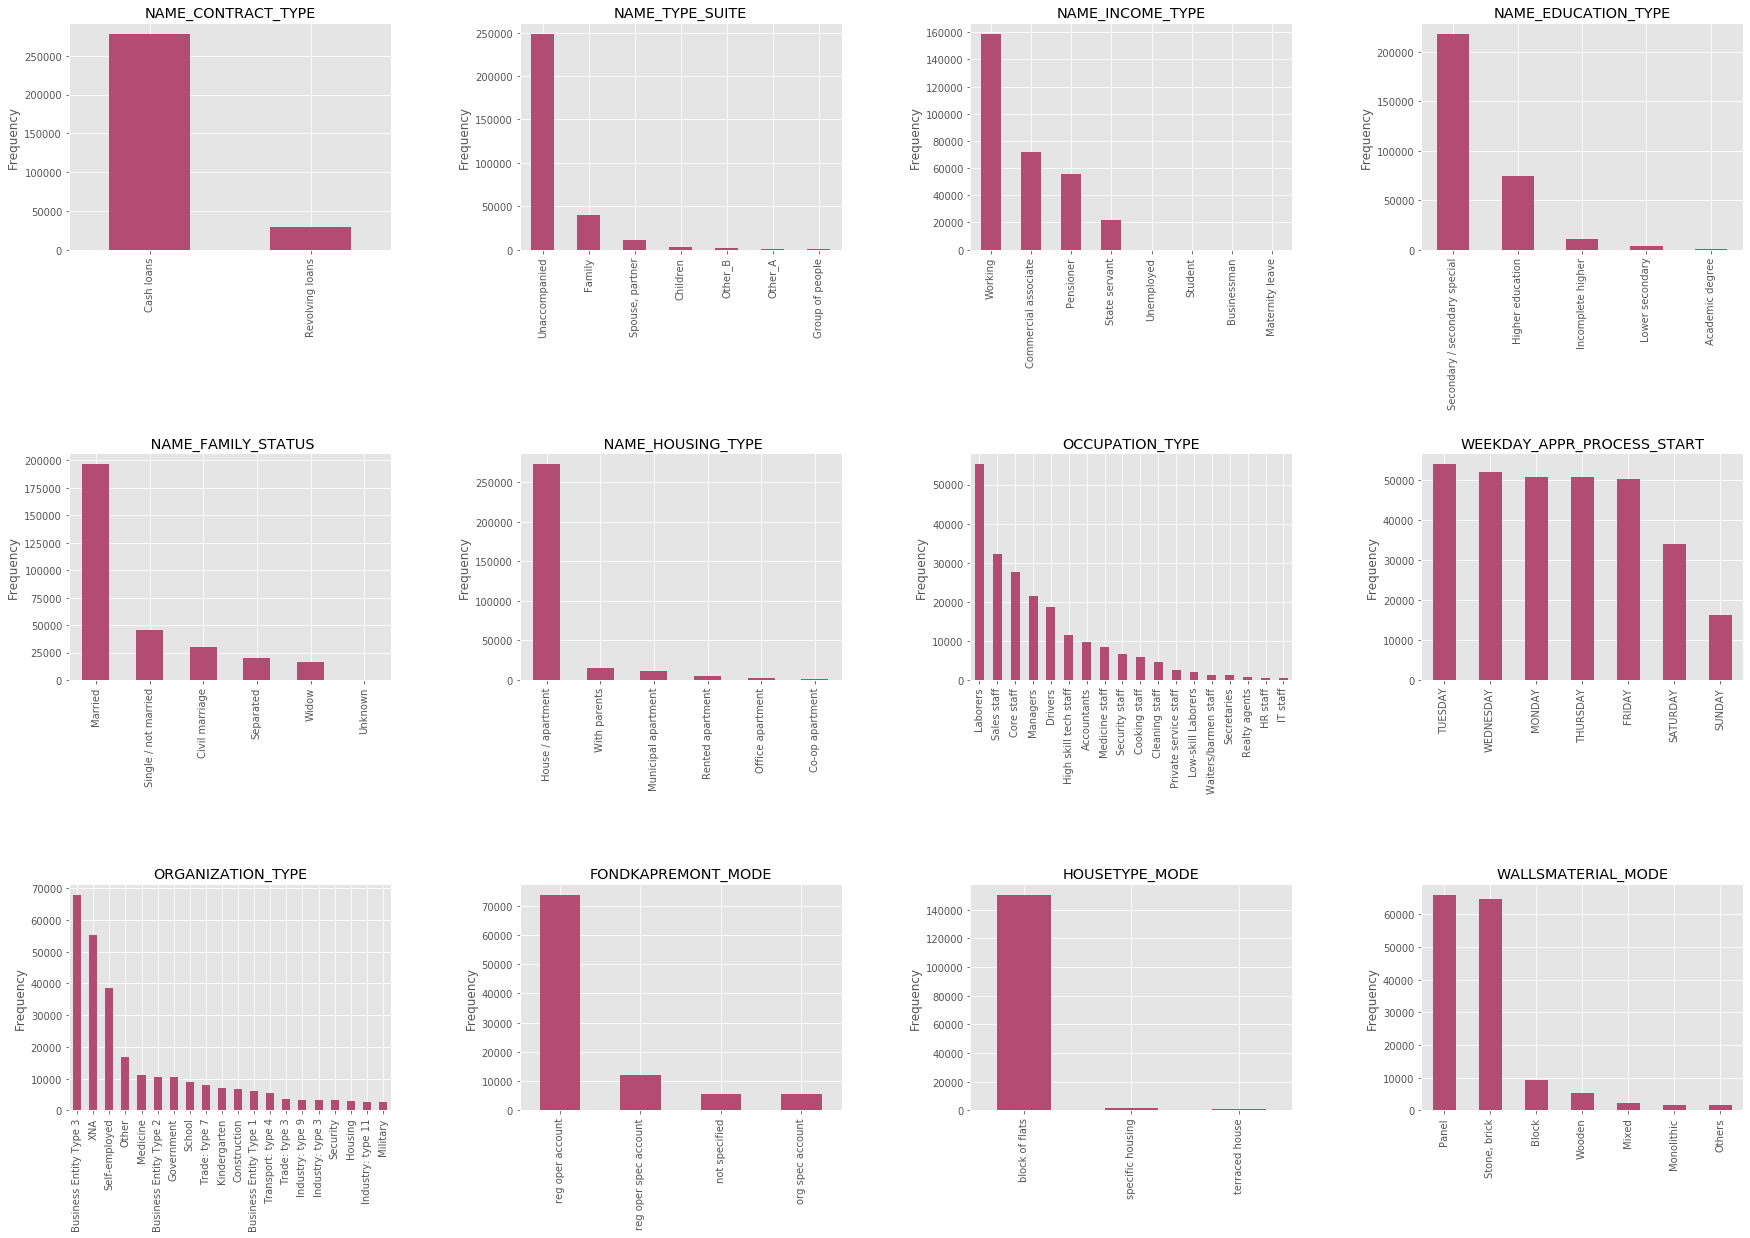

In [22]:
## do this by hand ... later make it better

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(30,20)) # 12 plots 

# row 1
# NAME_CONTRACT_TYPE
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('NAME_CONTRACT_TYPE')
cat1['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                                color = '#b34c71',
                                                                                ax=axes[0,0])

# NAME_TYPE_SUITE
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('NAME_TYPE_SUITE')
cat1['NAME_TYPE_SUITE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                                color = '#b34c71',
                                                                                ax=axes[0,1])
# NAME_INCOME_TYPE
axes[0,2].set_ylabel('Frequency')
axes[0,2].set_title('NAME_INCOME_TYPE')
cat1['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                                color = '#b34c71',
                                                                                ax=axes[0,2])
# NAME_EDUcat1ION_TYPE
axes[0,3].set_ylabel('Frequency')
axes[0,3].set_title('NAME_EDUCATION_TYPE')
cat1['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[0,3])
# row 2

# NAME_FAMILY_STATUS
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title(' NAME_FAMILY_STATUS')
cat1['NAME_FAMILY_STATUS'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[1,0])
# NAME_HOUSING_TYPE
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title(' NAME_HOUSING_TYPE')
cat1['NAME_HOUSING_TYPE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[1,1])
# OCCUPATION_TYPE
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_title('OCCUPATION_TYPE')
cat1['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[1,2])
# WEEKDAY_APPR_PROCESS_START
axes[1,3].set_ylabel('Frequency')
axes[1,3].set_title('WEEKDAY_APPR_PROCESS_START')
cat1['WEEKDAY_APPR_PROCESS_START'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[1,3])
# row 3

# ORGANIZATION_TYPE
axes[2,0].set_ylabel('Frequency')
axes[2,0].set_title('ORGANIZATION_TYPE')
cat1['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[2,0])
# FONDKAPREMONT_MODE
axes[2,1].set_ylabel('Frequency')
axes[2,1].set_title('FONDKAPREMONT_MODE')
cat1['FONDKAPREMONT_MODE'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[2,1])
# HOUSETYPE_MODE
axes[2,2].set_ylabel('Frequency')
axes[2,2].set_title('HOUSETYPE_MODE')
cat1['HOUSETYPE_MODE'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[2,2])
# WALLSMATERIAL_MODE
axes[2,3].set_ylabel('Frequency')
axes[2,3].set_title('WALLSMATERIAL_MODE')
cat1['WALLSMATERIAL_MODE'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', 
                                                                        color = '#b34c71',
                                                                        ax=axes[2,3])
plt.subplots_adjust(hspace = 0.9, wspace = 0.4)
plt.show()

**NOTE 9**

NAME_CONTRACT_TYPE:
- Two type of contract: **cash loan** and **Revolving loans**
- The majority of the clients request **cash loan** contract 

NAME_TYPE_SUITE
-  The majority of the clients were **unaccompanied** when applying for the previous application

NAME_INCOME_TYPE
- almost all of the clients are employed (which makes sense)

NAME_FAMILY_STATUS
- The majority of the clients are married 

WEEKDAY_APPR_PROCESS_START
- Clients start their loan application ~ uniformly Monday - Friday 
- less so on the weekend

NAME_HOUSING_TYPE - current housing situation 
- the majority of the clients either live in a house or apartment
- some live with their parents


## Numerical 

There are over 100 numerical features in this dataset; therefore, we're only going to investigate a small subset. I specifically, we're going to look at AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_EMPLOYEd DAYS_BIRTH - these are the feature that seemed interesting (based on their description) and they're not sparse (they contain data!!)

In [23]:
hand_pick = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
            'DAYS_EMPLOYED', 'DAYS_BIRTH']
num_subset = numeric1.loc[:, hand_pick]
num_subset.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH
0,202500.0,406597.5,24700.5,351000.0,-637,-9461
1,270000.0,1293502.5,35698.5,1129500.0,-1188,-16765
2,67500.0,135000.0,6750.0,135000.0,-225,-19046
3,135000.0,312682.5,29686.5,297000.0,-3039,-19005
4,121500.0,513000.0,21865.5,513000.0,-3038,-19932


In [24]:
## basic statistcs 
num_subset.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,63815.045904,-16036.995067
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,141275.766519,4363.988632
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-17912.000000,-25229.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-2760.000000,-19682.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-1213.000000,-15750.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-289.000000,-12413.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,365243.000000,-7489.000000


**NOTE 10**

The statistics for DAYS_EMPLOYED and DAYS_BIRTH seems quite off. Recall, DAYS_EMPLOYED - How many days before the application the person started current employment. In other words, how many days have each client been working at current job prior to starting or completing the application. Therefore, if we look at the maximum value, 365243 (in days), that implies client X have been employed at their job for about  365243/365 ~ 100 years. Based on the definition, the min should be 0 which implies that client X was unemployed prior to starting the application and I would assume the maximum value (365\*40 - 365\*50) i.e 40 - 50 years.

Also, we usually calculate people's age in years not in days. 

In [25]:
# fix error
num_subset['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
num_subset['DAYS_EMPLOYED'] =num_subset['DAYS_EMPLOYED'].apply(lambda x: abs(x))

num_subset['BIRTH_IN_YEARS'] = num_subset['DAYS_BIRTH'].apply(lambda x: abs(x)/365)

num_subset.loc[:, ['DAYS_EMPLOYED', 'BIRTH_IN_YEARS']].describe()

,DAYS_EMPLOYED,BIRTH_IN_YEARS
count,252137.000000,307511.000000
mean,2384.169325,43.936973
std,2338.360162,11.956133
min,0.000000,20.517808
25%,767.000000,34.008219
50%,1648.000000,43.150685
75%,3175.000000,53.923288
max,17912.000000,69.120548


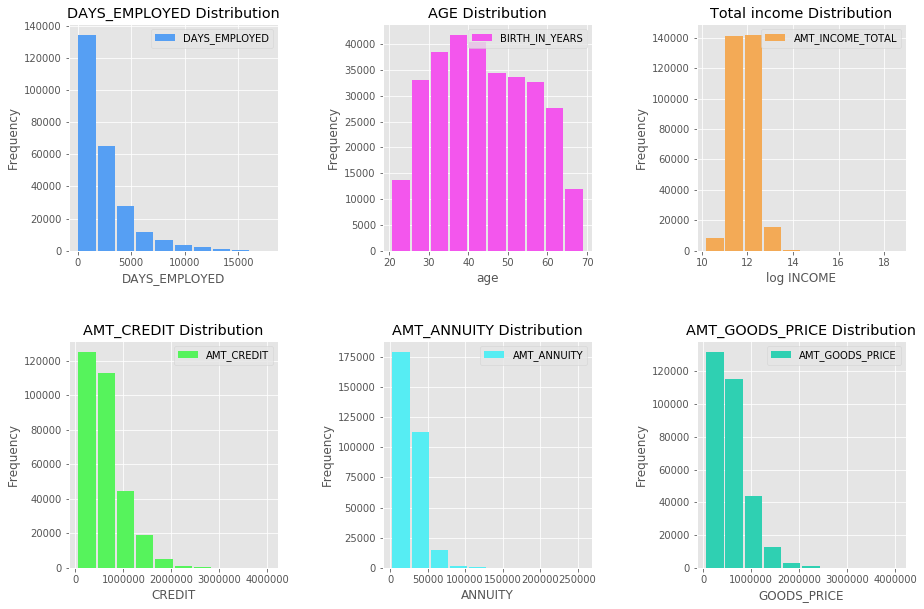

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

ax[0,0].hist(num_subset['DAYS_EMPLOYED'], label = 'DAYS_EMPLOYED', color = '#569FF3', rwidth=0.9) 
ax[0,0].set_xlabel('DAYS_EMPLOYED')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('DAYS_EMPLOYED Distribution')
ax[0,0].legend()


ax[0,1].hist(num_subset['BIRTH_IN_YEARS'], label = 'BIRTH_IN_YEARS', color = '#F356ED', rwidth=0.9) 
ax[0,1].set_xlabel('age')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_title('AGE Distribution')
ax[0,1].legend()

ax[0,2].hist(np.log(num_subset['AMT_INCOME_TOTAL']), label = 'AMT_INCOME_TOTAL', color = '#F3AA56', rwidth=0.9) 
ax[0,2].set_xlabel('log INCOME')
ax[0,2].set_ylabel('Frequency')
ax[0,2].set_title('Total income Distribution')
ax[0,2].legend()

ax[1,0].hist(num_subset['AMT_CREDIT'], label = 'AMT_CREDIT', color = '#56F35C', rwidth=0.9) 
ax[1,0].set_xlabel('CREDIT')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('AMT_CREDIT Distribution')
ax[1,0].legend()

ax[1,1].hist(num_subset['AMT_ANNUITY'], label = 'AMT_ANNUITY', color = '#56EDF3', rwidth=0.9) 
ax[1,1].set_xlabel('ANNUITY')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_title('AMT_ANNUITY Distribution')
ax[1,1].legend()

ax[1,2].hist(num_subset['AMT_GOODS_PRICE'], label = 'AMT_GOODS_PRICE', color = '#2FD0B2', rwidth=0.9) 
ax[1,2].set_xlabel('GOODS_PRICE')
ax[1,2].set_ylabel('Frequency')
ax[1,2].set_title('AMT_GOODS_PRICE Distribution')
ax[1,2].legend()

plt.subplots_adjust(hspace = 0.4, wspace = 0.5)
plt.show()

**NOTE 11**

DAYS_EMPLOYED
- On average - clients have worked 6 years at a particular company prior to starting the application. Very few are unemployed or have worked over 50 years. 
- Right skewed distribution

BIRTH_IN_YEARS
- As assumed, the clients age is normally distributed
- The average age of the client is about 43 years old (middle age)

AMT_INCOME_TOTAL
- The average total income is about 160,000
- approx log normal 

AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE
- Right skewed distribution

## Distribution of Target variable

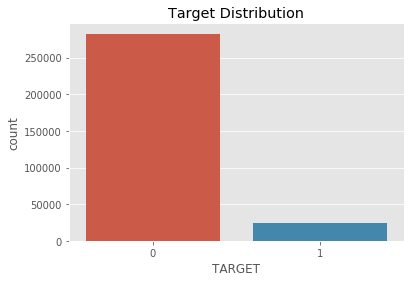

In [27]:
# target Distribution
sns.countplot(application_train['TARGET'])
plt.title('Target Distribution')
plt.show()

**NOTE 12**
- BAD NEWS: the class distribution is highly imbalanced. 

Recall: 
- Target variable: 1
    - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
- Target variable: 0 
    - all other cases
    
 Let's use a pie chart to get a better visualization of the prop of each class 

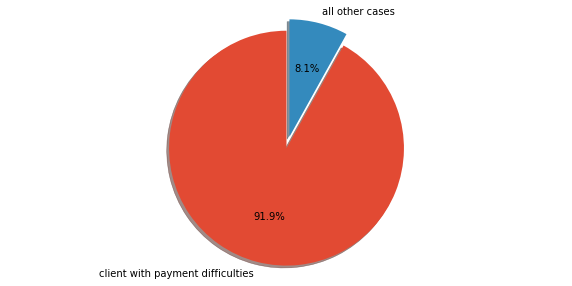

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['client with payment difficulties', 'all other cases']
sizes = list(application_train['TARGET'].value_counts())
explode = (0, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**NOTE**

AS you can see above - about 92% of the clients have difficulties paying their loan i.e miss payment (X days after due date)

## Conclusion plus Next step

- The first problem we need to address is how we're going to handle this imbalanced datasets!! There are few methods we can attempt - here seven ways we can approach this problem link: [link](https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html) for more derail.
    - Use the right evaluation metrics
        - Precision/Specificity: how many selected instances are relevant.
        - Recall/Sensitivity: how many relevant instances are selected.
        - F1 score: harmonic mean of precision and recall.
        - MCC: correlation coefficient between the observed and predicted binary classifications.
        - AUC: relation between true-positive rate and false positive rate.
    - Resample the training set
        - Under-sampling
        - Over-sampling
    - Use K-fold Cross-Validation in the right way
    - Ensemble different resampled datasets
    - Resample with different ratios
    - Cluster the abundant class
    - Design your own models
    
- As we move more towards the modeling stage we need to make sure the general assumptions about ML models are satisfied (or pretty close) - specifically independence i.e **There should be no or little multicollinearity**
    - As you can tell, a lot of the features are correlated. This is mostly due to the raw information provided from the dataset (not including the statistical information). We can easily fix this in the feature engineering stage. For instance for the application train features: 
        - PAYMENT_RATE  --> AMT_ANNUITY/AMT_CREDIT
        - INCOME_PER_PERSON --> AMT_INCOME_TOTAL/CNT_FAM_MEMBERS
        - INCOME_CREDIT_IN_PERCENTAGE --> AMT_INCOME_TOTAL/AMT_CREDIT
        - ANNUITY_INCOME_IN_PERCENTAGE --> AMT_ANNUITY/AMT_INCOME_TOTAL
        - and so on
        
    - We also need to check correlation between the Target variable and the other features
       - **NOTE:** if the target variable is correlated with a feature, that feature can possibly harm the model
       - I'm going to look into this in my second more detailed EDA
       
- Implement more useful functions
    - we need few important functions such as:
        - (1) Since we have a decent amount of categorical features where some contain binary values - we need to create a function that will **label encode** the binary categorical features and **One Hot Encode** the non-binary categorical features - also for **One Hot Encoded** features we need to keep track of the new columns. If we can make a generalizable function that can work for all of the tables - that will be DOPE!!
        - (2) Joining function - join each table.
            - Note: except for the application table we need to aggregate the other tables with basic statistics (count, mean, mode, median) with the by the correspond ID so we can join them together.
        - (3) customized imputer function (or multiple imputer pipeline)
            - We need multiple imputers since we're dealing with categorical and numerical features and if we can our strategy (impute based on mean, mode, median) should be based on the features distribution. 
- Some of us should also focus on identifying and handling anomalies
            
- Baseline model:
    - For this model we don't need to go crazy with the feature engineering. Truthfully - we can just use the application training and testing data set and apply few different algorithms and test its accuracy
        - When I say "test its accuracy" - I mean submit to kaggle. We get 4 submission a day and it will gives us a score. Our goal should be about 80% (this is going to be quite difficult) 
        - If you don't have kaggle account - it's pretty easy to make one and there's a tutorial on how to submit. If you don't want make an account or submit - you can send me your submission file and I can submit it on my account. We can also make a team on kaggle but I don't know how to do that and that might not be allowed now since the challenge is past due. Anyways here are some awesome resources: 
            - [HELP FROM A GRAND MASTER](https://www.kaggle.com/c/home-credit-default-risk/discussion/58332)
            - [DOMAIN KNOWLEDGE](https://www.kaggle.com/c/home-credit-default-risk/discussion/63032)
    